<a href="https://colab.research.google.com/github/andrewjoyner9/intro_to_ml/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ANDREW JOYNER
# 801293231
# HOMEWORK #1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv"
df = pd.read_csv(url)
display(df.head())

In [10]:
X1 = df.values[:,0]
X2 = df.values[:,1]
X3 = df.values[:,2]
y = df.values[:,3]

Feature: X1
Model: y = 5.9279 + -2.0383*X1
Final loss: 0.9850



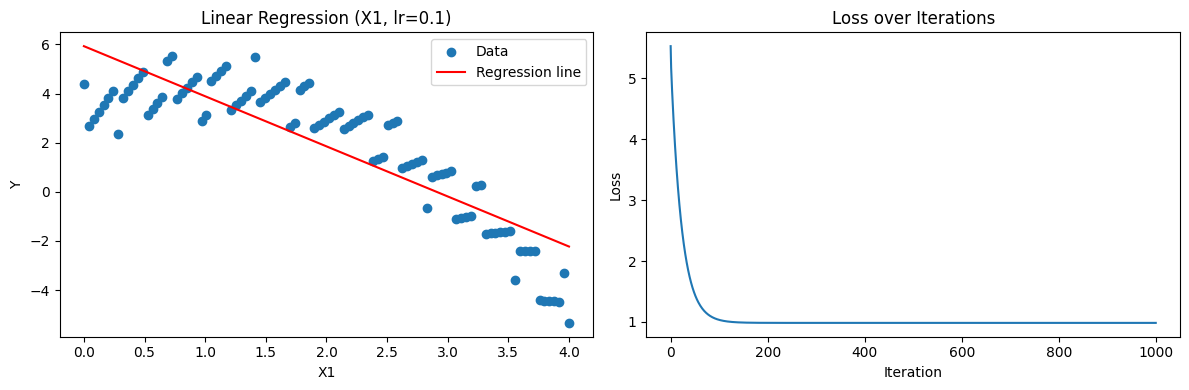

Feature: X2
Model: y = 0.7361 + 0.5576*X2
Final loss: 3.5994



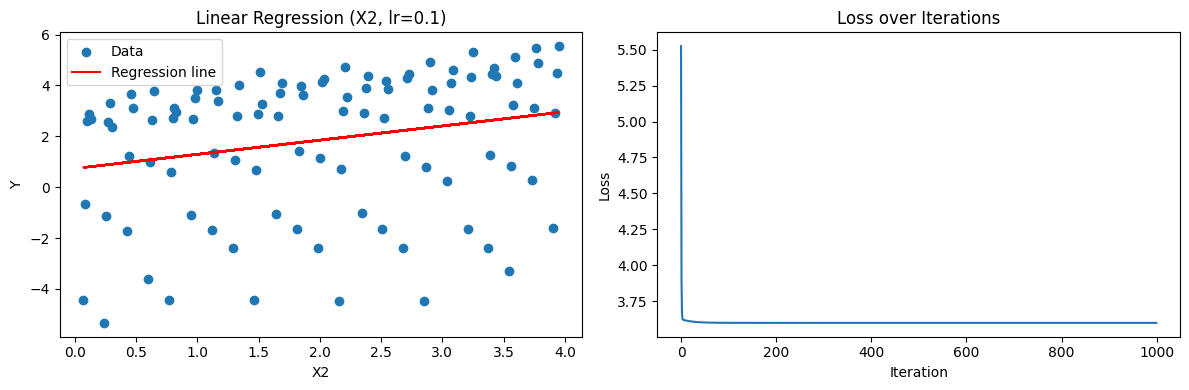

Feature: X3
Model: y = 2.8714 + -0.5205*X3
Final loss: 3.6295



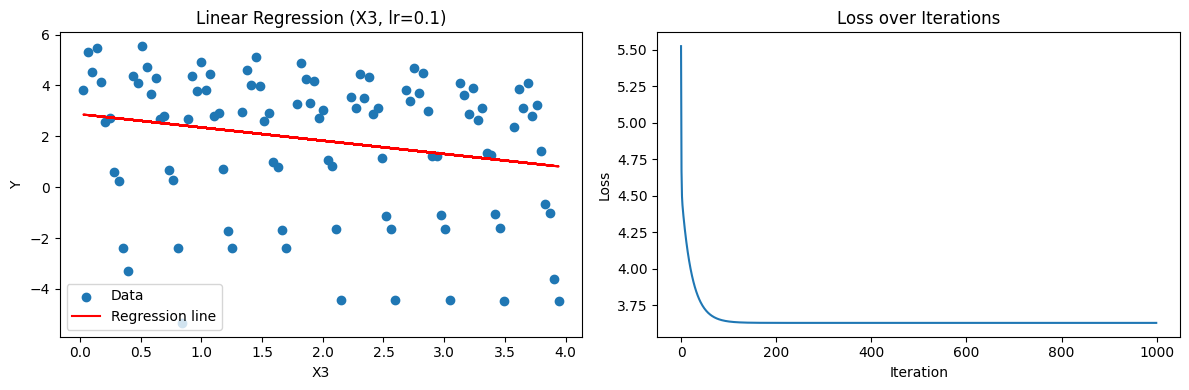

In [22]:
#problem 1

def run_and_plot(X, y, feature_name): #functionalized pltting to reduce reppetitive code
	theta0, theta1, loss_history = gradient_descent(X, y, lr=0.1, epochs=1000)
	print(f"Feature: {feature_name}")
	print(f"Model: y = {theta0:.4f} + {theta1:.4f}*{feature_name}")
	print(f"Final loss: {loss_history[-1]:.4f}\n")
	plt.figure(figsize=(12,4))
	plt.subplot(1,2,1)
	plt.scatter(X, y, label='Data')
	plt.plot(X, theta0 + theta1*X, color='red', label='Regression line')
	plt.xlabel(feature_name)
	plt.ylabel('Y')
	plt.title(f'Linear Regression ({feature_name}, lr=0.1)')
	plt.legend()
	plt.subplot(1,2,2)
	plt.plot(loss_history)
	plt.xlabel('Iteration')
	plt.ylabel('Loss')
	plt.title('Loss over Iterations')
	plt.tight_layout()
	plt.show()

#run for all three values
run_and_plot(X1, y, 'X1')
run_and_plot(X2, y, 'X2')
run_and_plot(X3, y, 'X3')

def gradient_descent(X, y, lr=0.1, epochs=1000):
	m = len(y)
	theta0 = 0.0
	theta1 = 0.0
	loss_history = []
	for i in range(epochs):
		y_pred = theta0 + theta1 * X
		error = y_pred - y
		loss = (1/(2*m)) * np.sum(error ** 2)
		loss_history.append(loss)
		#gradients
		d_theta0 = (1/m) * np.sum(error)
		d_theta1 = (1/m) * np.sum(error * X)
		#update
		theta0 -= lr * d_theta0
		theta1 -= lr * d_theta1
	return theta0, theta1, loss_history

Model (learning rate=0.1):
y = 5.3139 + -2.0037*X1 + 0.5326*X2 + -0.2656*X3
Final loss: 0.7385



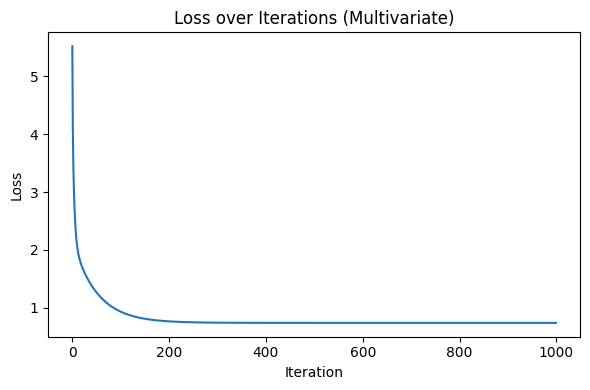

Predicted y for (X1,X2,X3)=(1,1,1): 3.5773
Predicted y for (X1,X2,X3)=(2,0,4): 0.2443
Predicted y for (X1,X2,X3)=(3,2,1): 0.1025


In [23]:




#problem2

def gradient_descent_multi(X, y, lr=0.1, epochs=1000):
	m, n = X.shape
	theta = np.zeros(n)
	loss_history = []
	for i in range(epochs):
		y_pred = X @ theta
		error = y_pred - y
		loss = (1/(2*m)) * np.sum(error ** 2)
		loss_history.append(loss)
		grad = (1/m) * (X.T @ error)
		theta -= lr * grad
	return theta, loss_history

#prepare x matrix with the bias terms 1
X = np.column_stack((np.ones(len(X1)), X1, X2, X3))

#run the gradient descent with new X
theta, loss_history = gradient_descent_multi(X, y, lr=0.1, epochs=1000)

print("Model (learning rate=0.1):")
print(f"y = {theta[0]:.4f} + {theta[1]:.4f}*X1 + {theta[2]:.4f}*X2 + {theta[3]:.4f}*X3")
print(f"Final loss: {loss_history[-1]:.4f}\n")

#plot loss
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations (Multivariate)')
plt.tight_layout()
plt.show()

#predict
def predict(X_new, theta):
	return X_new @ theta

X_new = np.array([
	[1, 1, 1, 1],
	[1, 2, 0, 4],
	[1, 3, 2, 1]
])
predictions = predict(X_new, theta)
for i, x in enumerate(X_new):
	print(f"Predicted y for (X1,X2,X3)=({x[1]},{x[2]},{x[3]}): {predictions[i]:.4f}")